<a href="https://colab.research.google.com/github/dromero1/voice-gender-recognition-autoencoder/blob/main/src/voice_gender_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Voice Gender Recognition (Machine Learning)

In [1]:
%matplotlib inline

*Mount drive*

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


*Import libraries*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve

*Paths*

In [4]:
data_path = 'drive/MyDrive/voice_gender_recognition/data/'
figs_path = 'drive/MyDrive/voice_gender_recognition/figs/'

## 1. Preprocessing

*Read dataset*

In [5]:
dataset = pd.read_csv(data_path + 'reduced_voice.csv', index_col=0)

*Validate structure*

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3168 non-null   float64
 1   1       3168 non-null   float64
 2   2       3168 non-null   float64
 3   3       3168 non-null   float64
 4   4       3168 non-null   float64
 5   5       3168 non-null   float64
 6   6       3168 non-null   float64
 7   7       3168 non-null   float64
 8   8       3168 non-null   float64
 9   9       3168 non-null   float64
 10  label   3168 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 297.0 KB


*Feature matrix*

In [7]:
features = dataset.iloc[:, :-1].values

*Number of features*

In [8]:
num_features = features.shape[1]

*Label vector*

In [9]:
labels = dataset.iloc[:, -1].values

## 2. Visualization

*Display projection*

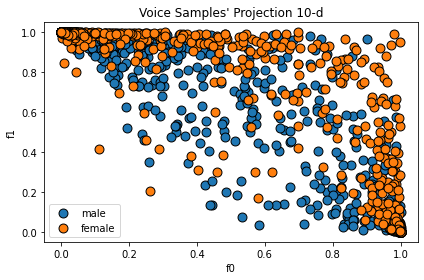

In [10]:
(f1, f2) = (0, 1)
plt.figure()
plt.scatter(features[labels == 1, f1], features[labels == 1, f2], s=80, edgecolors='black', label='male')
plt.scatter(features[labels == 0, f1], features[labels == 0, f2], s=80, edgecolors='black', label='female')
plt.ylabel('f{}'.format(dataset.columns[f2]))
plt.xlabel('f{}'.format(dataset.columns[f1]))
plt.title("Voice Samples' Projection {}-d".format(num_features))
plt.legend()
plt.tight_layout()
plt.savefig(figs_path + 'voice_projection_{}d.pdf'.format(num_features))
plt.show()

## 3. Learning

*Split in train and rest*

In [11]:
features_train, features_rest, labels_train, labels_rest = train_test_split(features, labels, test_size=0.40)

*Split in validation and test*

In [12]:
features_val, features_test, labels_val, labels_test = train_test_split(features, labels, test_size=0.50)

### Decision Tree

*Train model*

In [13]:
classifier1 = DecisionTreeClassifier(criterion='entropy')
classifier1.fit(features_train, labels_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

*Plot decision tree*

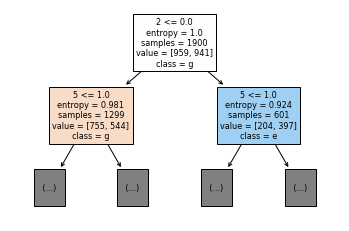

In [14]:
plt.figure()
_ = plot_tree(classifier1, max_depth=1, feature_names=dataset.columns, class_names='gender', filled=True)
plt.savefig(figs_path + 'decision_tree_{}d.pdf'.format(num_features))

### SVM linear Kernel

*Train model*

In [15]:
classifier2 = SVC(kernel='linear', probability=True)
classifier2.fit(features_train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### SVM polynomial Kernel

*Train model*

In [16]:
classifier3 = SVC(kernel='poly', probability=True)
classifier3.fit(features_train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### SVM RBF Kernel

*Train model*

In [17]:
classifier4 = SVC(probability=True)
classifier4.fit(features_train, labels_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Logistic Regression

*Train model*

In [18]:
classifier5 = LogisticRegression()
classifier5.fit(features_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 4. Evaluation

*Classifiers*

In [19]:
classifiers = [classifier1, classifier2, classifier3, classifier4, classifier5]
classifiers_names = ['Decision Tree', 'Linear SVM', 'Polynomial SVM', 'RBF SVM', 'Logistic Regression']

*Compute performance metrics*

In [20]:
def compute_metrics(labels_eval, labels_pred):
    metrics = {}
    tn, fp, fn, tp = confusion_matrix(labels_eval, labels_pred).ravel()
    metrics['accuracy'] = (tp + tn) / (tp + tn + fp + fn)
    metrics['sensitivity'] = tp / (tp + fn)
    metrics['specificity'] = tn / (tn + fp)
    return metrics

*Assess classifiers' performance*

In [21]:
def assess_performance(classifiers, features_eval, labels_eval):
    performance = {}
    for index, classifier in enumerate(classifiers):
        labels_pred = classifier.predict(features_eval)
        performance['C{}'.format(index + 1)] = compute_metrics(labels_eval, labels_pred)
    return performance

*Evaluate classifiers' performance in the validation set*

In [22]:
performance_val = assess_performance(classifiers, features_val, labels_val)
pd.DataFrame(performance_val).T

,accuracy,sensitivity,specificity
C1,0.847854,0.872050,0.822850
C2,0.631313,0.688199,0.572529
C3,0.664141,0.678261,0.649551
C4,0.657197,0.700621,0.612323
C5,0.641414,0.691925,0.589217


*Evaluate classifiers' performance in the test set*

In [23]:
performance_test = assess_performance(classifiers, features_test, labels_test)
pd.DataFrame(performance_test).T

,accuracy,sensitivity,specificity
C1,0.854798,0.887035,0.823602
C2,0.616793,0.686778,0.549068
C3,0.652146,0.691913,0.613665
C4,0.642045,0.709884,0.576398
C5,0.614899,0.685494,0.546584


*Plot ROC curves*

<Figure size 432x288 with 0 Axes>

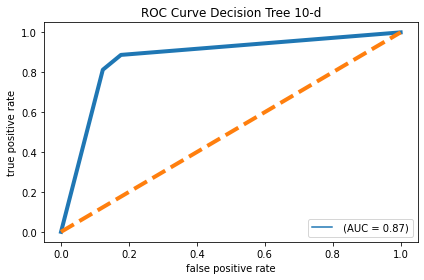

<Figure size 432x288 with 0 Axes>

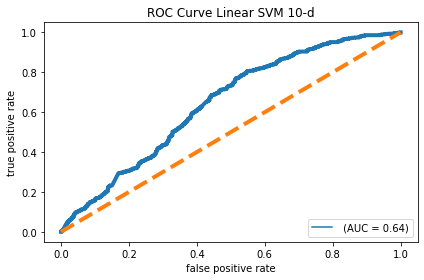

<Figure size 432x288 with 0 Axes>

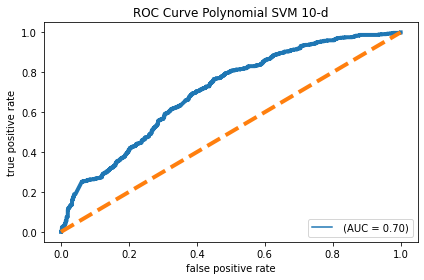

<Figure size 432x288 with 0 Axes>

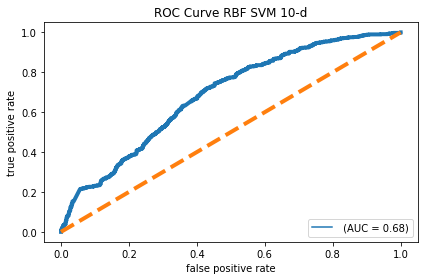

<Figure size 432x288 with 0 Axes>

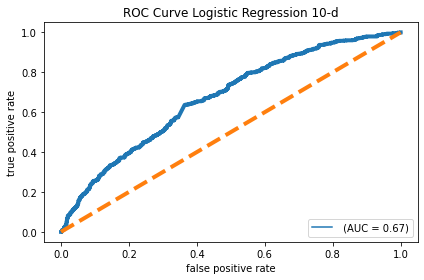

In [24]:
for index, classifier in enumerate(classifiers):
    classifier_name = classifiers_names[index]
    plt.figure()
    roc_figure = plot_roc_curve(classifier, features_test, labels_test, name='')
    roc_figure.line_.set_linewidth(4)
    plt.plot([0.0, 1.0], [0.0, 1.0], '--', linewidth=4)
    plt.ylabel('true positive rate')
    plt.xlabel('false positive rate')
    plt.title('ROC Curve {} {}-d'.format(classifier_name, num_features))
    plt.tight_layout()
    plt.savefig(figs_path + 'roc_{}_{}d.pdf'.format(classifier_name.lower(), num_features))
    plt.show()